## 1. cargar datos y verificación 

In [1]:
# primer data frame
import pandas as pd 
import numpy as np
CLIENTES_01 = pd.DataFrame()
CLIENTES_01 = pd.read_csv('CLIENTES_01.csv',delimiter= ';',index_col=0)
CLIENTES_01.head()

,ACTIVO_TOTAL,CAJA_BANCOS,CAPITAL,DOCS_X_COBRAR,COSTO_VTAS,DEUDORES_DIV,PAS_CIRCULANTE
ID_PERSONA,,,,,,,
CLPR001,24358000,450000.0,11999000.0,944000.0,30884000,450000,12294000
CLPR002,46230000,178000.0,4432000.0,3394000.0,22365000,1353000,27025000
CLPR003,20141000,201000.0,15174000.0,5223000.0,66000,2000,760000
CLPR004,27986000,1012000.0,15940000.0,11021000.0,58401000,49000,11825000
CLPR005,14714000,830000.0,7773000.0,6026000.0,63847000,48000,4983000


In [2]:
# segundo data frame
CLIENTES_02 = pd.DataFrame()
CLIENTES_02 = pd.read_csv('CLIENTES_02.csv',delimiter= ';',index_col=0)
CLIENTES_02.head()

,PAS_LARGO_PLAZO,VTAS_NETAS_TOTALES,ANIOS_FUNCIONA,SECTOR_AIS,MORA
ID_PERSONA,,,,,
CLPR001,65000,40246000,0,3,0
CLPR002,14773000,23287000,11,6,0
CLPR003,4207000,24128000,12,4,0
CLPR004,221000,65948000,8,4,0
CLPR005,1958000,67094000,1,5,0


### vericar tamaño de cada data frame

In [3]:
CLIENTES_01.shape


(999, 7)

In [4]:
CLIENTES_02.shape

(999, 5)

### Unión de data frame

In [5]:
CLIENTES03 = pd.merge(CLIENTES_01,CLIENTES_02, on='ID_PERSONA')

In [6]:
CLIENTES03.head()

,ACTIVO_TOTAL,CAJA_BANCOS,CAPITAL,DOCS_X_COBRAR,COSTO_VTAS,DEUDORES_DIV,PAS_CIRCULANTE,PAS_LARGO_PLAZO,VTAS_NETAS_TOTALES,ANIOS_FUNCIONA,SECTOR_AIS,MORA
ID_PERSONA,,,,,,,,,,,,
CLPR001,24358000,450000.0,11999000.0,944000.0,30884000,450000,12294000,65000,40246000,0,3,0
CLPR002,46230000,178000.0,4432000.0,3394000.0,22365000,1353000,27025000,14773000,23287000,11,6,0
CLPR003,20141000,201000.0,15174000.0,5223000.0,66000,2000,760000,4207000,24128000,12,4,0
CLPR004,27986000,1012000.0,15940000.0,11021000.0,58401000,49000,11825000,221000,65948000,8,4,0
CLPR005,14714000,830000.0,7773000.0,6026000.0,63847000,48000,4983000,1958000,67094000,1,5,0


In [7]:
CLIENTES03.shape

(998, 12)

## 2. Construcción y análisis de varibale

In [8]:
def RAT_AP(dataframe: pd.DataFrame) -> pd.Series:
    return (dataframe["PAS_CIRCULANTE"] + dataframe["PAS_LARGO_PLAZO"]) / dataframe["CAPITAL"]
                     
CLIENTES03['RAT_AP'] = RAT_AP(dataframe=CLIENTES03)

## Análisis estadistico

In [9]:
CLIENTES03.describe()

,ACTIVO_TOTAL,CAJA_BANCOS,CAPITAL,DOCS_X_COBRAR,COSTO_VTAS,DEUDORES_DIV,PAS_CIRCULANTE,PAS_LARGO_PLAZO,VTAS_NETAS_TOTALES,ANIOS_FUNCIONA,SECTOR_AIS,MORA,RAT_AP
count,9.980000e+02,9.980000e+02,9.970000e+02,8.700000e+02,9.980000e+02,9.980000e+02,9.980000e+02,9.980000e+02,9.980000e+02,998.000000,998.000000,998.000000,997.000000
mean,6.627588e+07,1.302605e+14,4.096677e+07,9.642262e+06,2.424897e+07,1.401310e+06,1.732993e+07,7.999902e+06,3.850747e+07,5.743487,3.570140,0.183367,0.847371
std,2.536818e+08,4.115078e+15,2.049593e+08,3.283765e+07,2.151347e+07,4.345452e+06,4.557984e+07,4.701118e+07,2.466604e+07,4.577685,1.747499,0.387161,7.887060
min,9.030000e+03,-6.593000e+06,-1.435300e+07,-1.600000e+04,0.000000e+00,0.000000e+00,0.000000e+00,-1.693000e+06,1.000000e+03,-80.000000,1.000000,0.000000,-190.230519
25%,1.558000e+07,1.760000e+05,6.864000e+06,1.061250e+06,3.539000e+06,0.000000e+00,3.437750e+06,0.000000e+00,1.769275e+07,3.000000,2.000000,0.000000,0.254700
50%,2.955750e+07,5.090000e+05,1.594000e+07,4.017000e+06,2.062300e+07,1.305000e+05,7.904500e+06,2.805000e+05,3.639300e+07,6.000000,4.000000,0.000000,0.649259
75%,5.652325e+07,1.500750e+06,3.239600e+07,1.080975e+07,3.940350e+07,1.014250e+06,1.713650e+07,4.027500e+06,5.771575e+07,9.000000,5.000000,0.000000,1.397363
max,6.521729e+09,1.300000e+17,5.106718e+09,7.032370e+08,9.093000e+07,5.241000e+07,8.201800e+08,1.193737e+09,8.965000e+07,12.000000,6.000000,1.000000,99.837209


## gráficos

In [12]:
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

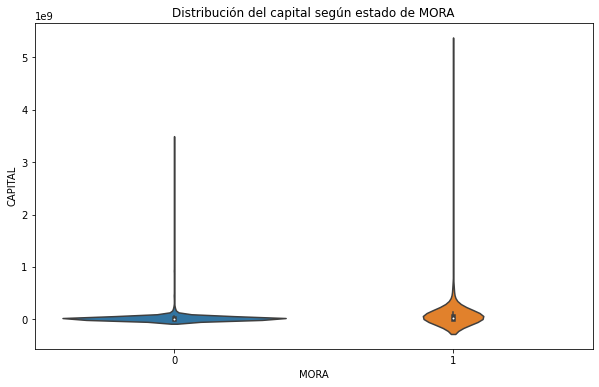

In [13]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.violinplot(
        x     = 'MORA',
        y     = 'CAPITAL',
        data  = CLIENTES03,
        #color = "white",
        ax    = ax
    )

ax.set_title('Distribución del capital según estado de MORA');

## MODELO 

In [14]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.weightstats import ttest_ind
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix

### normalizar datos para mejora del modelo 

In [15]:
def minmax_norm(DataFrame):
    return (DataFrame - DataFrame.min()) / ( DataFrame.max() - DataFrame.min())

CLIENTES03_norm = minmax_norm(CLIENTES03)

CLIENTES03_norm

,ACTIVO_TOTAL,CAJA_BANCOS,CAPITAL,DOCS_X_COBRAR,COSTO_VTAS,DEUDORES_DIV,PAS_CIRCULANTE,PAS_LARGO_PLAZO,VTAS_NETAS_TOTALES,ANIOS_FUNCIONA,SECTOR_AIS,MORA,RAT_AP
ID_PERSONA,,,,,,,,,,,,,
CLPR001,0.003734,5.417692e-11,0.005146,0.001365,0.339646,0.008586,0.014989,0.001471,0.448917,0.869565,0.4,0.0,0.659365
CLPR002,0.007087,5.208462e-11,0.003668,0.004849,0.245958,0.025816,0.032950,0.013774,0.259746,0.989130,1.0,0.0,0.688327
CLPR003,0.003087,5.226154e-11,0.005766,0.007450,0.000726,0.000038,0.000927,0.004935,0.269127,1.000000,0.6,0.0,0.656943
CLPR004,0.004290,5.850000e-11,0.005915,0.015694,0.642263,0.000935,0.014418,0.001601,0.735613,0.956522,0.6,0.0,0.658419
CLPR005,0.002255,5.710000e-11,0.004321,0.008592,0.702156,0.000916,0.006075,0.003054,0.748397,0.880435,0.8,0.0,0.658893
...,...,...,...,...,...,...,...,...,...,...,...,...,...
CLPR995,0.004723,5.577692e-11,0.007823,0.005467,0.193248,0.001965,0.005017,0.002241,0.539426,0.956522,1.0,0.0,0.656498
CLPR996,0.004139,5.081538e-11,0.005194,0.000444,0.284450,0.000000,0.017988,0.001416,0.400707,0.880435,0.6,0.0,0.659967
CLPR997,0.001836,5.182308e-11,0.003993,0.003424,0.166491,0.051612,0.007185,0.001416,0.224364,0.989130,1.0,0.0,0.659148


In [16]:
## VARIABLES 
X = CLIENTES03_norm.drop(columns = 'MORA')
y = CLIENTES03_norm['MORA']

X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

In [17]:
X_train = sm.add_constant(X_train, prepend=True)
modelo = sm.Logit(endog=y_train, exog=X_train,)
modelo = modelo.fit()
print(modelo.summary())

MissingDataError: exog contains inf or nans

### MODELO GENERA INF O NA, se sospecha presencia de valores faltantes en dataframe. Se tratarian estos datos y quedaría listo el modelo. 